In [27]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


In [28]:
torch.manual_seed(71)
X=torch.linspace(1,50,50).reshape(-1,1)
e=torch.randint(-8,9,(50,1),dtype=torch.float)
y = 2 * X + 1 + e

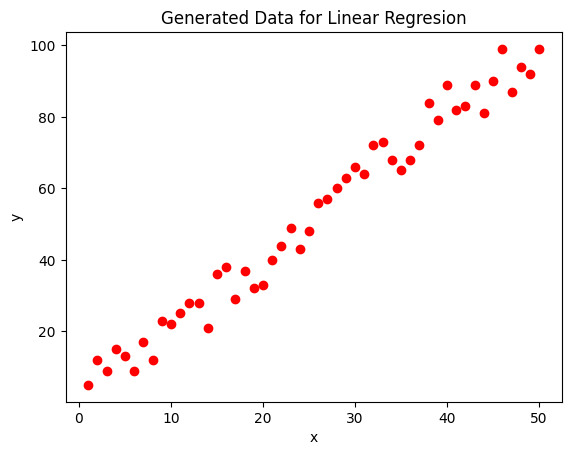

In [29]:
plt.scatter(X,y,c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data for Linear Regresion')
plt.show()

In [30]:
class Model(nn.Module):
    def __init__(self,in_features,out_features):
        super().__init__()
        self.linear=nn.Linear(in_features,out_features)
    def forward(self,x):
        return self.linear(x)

In [31]:
torch.manual_seed(59)
model=Model(1,1)

In [32]:
initial_weight=model.linear.weight.item()
initial_bias=model.linear.bias.item()
print("\nName: Nandakesore J")
print("\nRegister No: 212223240103")
print(f"Initial Weight: {initial_weight:.8f} , Initial Bias: {initial_bias:.8f}\n")


Name: Nandakesore J

Register No: 212223240103
Initial Weight: 0.10597813 , Initial Bias: 0.96379614



In [33]:
loss_function=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.001)

In [34]:
epochs=100
losses=[]


for epoch in range(1,epochs+1):
    optimizer.zero_grad()
    y_pred=model(X)
    loss=loss_function(y_pred,y)
    losses.append(loss.item())
    loss.backward()
    optimizer.step()

In [35]:
print(f'epoch: {epoch:2} loss:{loss.item():10.8f} \nweight: {model.linear.weight.item():10.8f} \nbias: {model.linear.bias.item():10.8f}')

epoch: 100 loss:21.03359604 
weight: 1.98277164 
bias: 1.09101629


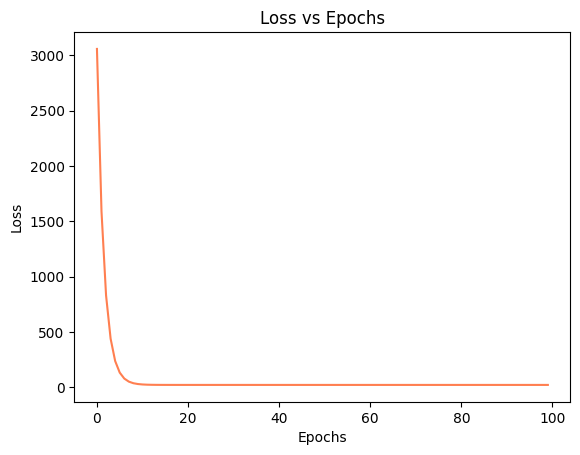

In [47]:
plt.plot(range(epochs),losses,color='coral')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()

In [37]:
final_weight=model.linear.weight.item()
final_bias=model.linear.bias.item()
print("\nName: Nandakesore J")
print("\nRegister No: 212223240103")
print(f"Final Weight: {final_weight:.8f} \nFinal Bias: {final_bias:.8f}")


Name: Nandakesore J

Register No: 212223240103
Final Weight: 1.98277164 
Final Bias: 1.09101629


In [38]:
x1=torch.tensor([X.min().item(), X.max().item()])
y1=x1*final_weight+final_bias

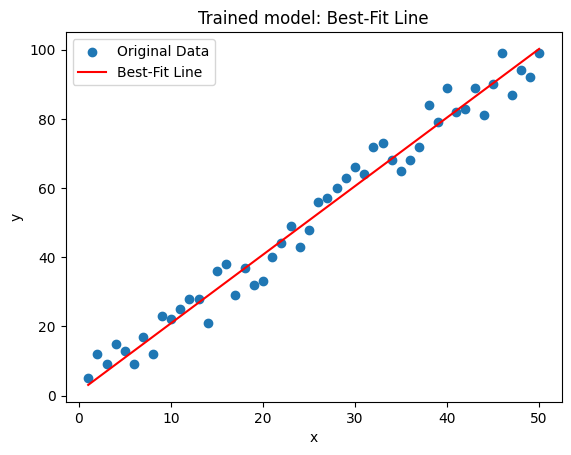

In [39]:
plt.scatter(X,y,label="Original Data")
plt.plot(x1,y1,'r',label='Best-Fit Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trained model: Best-Fit Line')
plt.legend()
plt.show()

In [40]:
x_new=torch.tensor([[120.0]])
y_new_pred=model(x_new).item()
print("\nName: Nandakesore J")
print("\nRegister No: 212223240103")
print(f"Predicted for x=120: {y_new_pred:.8f}")


Name: Nandakesore J

Register No: 212223240103
Predicted for x=120: 239.02362061
